In [1]:
%pylab inline
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from PIL import Image
import numpy as np


(256L, 256L, 3L)
(65536L,)


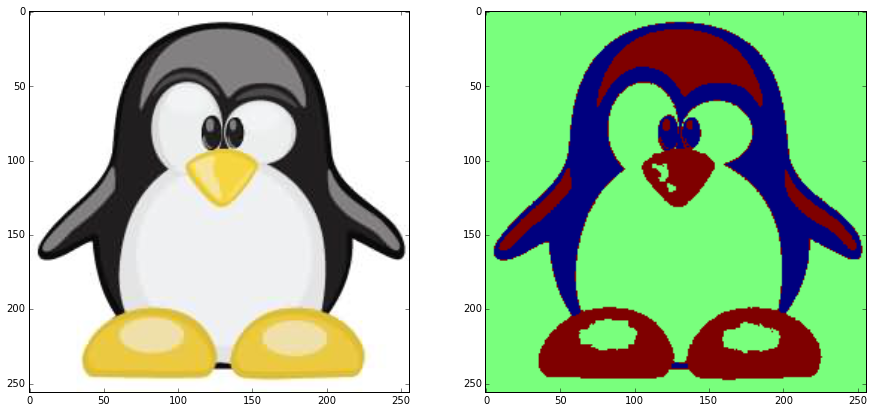

In [3]:
from scipy.cluster.vq import *
from scipy.misc import imresize

steps = 50 #image is divided in steps*steps region
im = array(Image.open('cartoon.jpg'))
print im.shape
dx = im.shape[0] / steps
dy = im.shape[1] / steps
# compute color features for each region
features = []
for x in range(im.shape[0]):
    for y in range(im.shape[1]):
        R = im[x,y,0]
        G = im[x,y,1]
        B = im[x,y,2]
        features.append([R,G,B])
features = array(features,'f') # make into array
# cluster
centroids,variance = kmeans(features,3)
code,distance = vq(features,centroids)
# create image with cluster labels
print code.shape
codeim = code.reshape(im.shape[0],im.shape[1])

fig = plt.figure(figsize=(15,15))
fig.add_subplot(1,2,1, title="")
imshow(im)
fig.add_subplot(1,2,2, title="")
codeim = imresize(codeim,im.shape[:2],interp='nearest')
imshow(codeim)
show()
